In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import sklearn
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv("baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.shape

(30, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<AxesSubplot:>

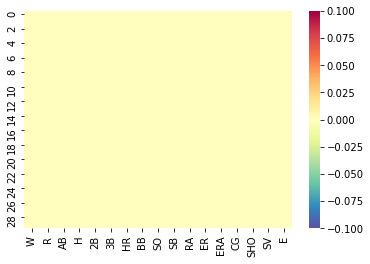

In [5]:
#checking missing values again 
sns.heatmap(df.isnull(),cmap="Spectral_r")

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

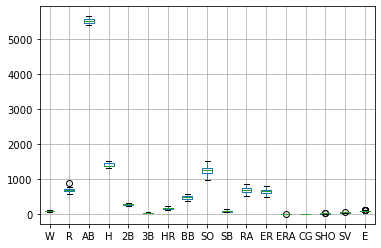

In [7]:
#checking the ranges  of data in the dataset 
df.boxplot()

W         AxesSubplot(0.125,0.125;0.0383663x0.755)
R       AxesSubplot(0.17104,0.125;0.0383663x0.755)
AB     AxesSubplot(0.217079,0.125;0.0383663x0.755)
H      AxesSubplot(0.263119,0.125;0.0383663x0.755)
2B     AxesSubplot(0.309158,0.125;0.0383663x0.755)
3B     AxesSubplot(0.355198,0.125;0.0383663x0.755)
HR     AxesSubplot(0.401238,0.125;0.0383663x0.755)
BB     AxesSubplot(0.447277,0.125;0.0383663x0.755)
SO     AxesSubplot(0.493317,0.125;0.0383663x0.755)
SB     AxesSubplot(0.539356,0.125;0.0383663x0.755)
RA     AxesSubplot(0.585396,0.125;0.0383663x0.755)
ER     AxesSubplot(0.631436,0.125;0.0383663x0.755)
ERA    AxesSubplot(0.677475,0.125;0.0383663x0.755)
CG     AxesSubplot(0.723515,0.125;0.0383663x0.755)
SHO    AxesSubplot(0.769554,0.125;0.0383663x0.755)
SV     AxesSubplot(0.815594,0.125;0.0383663x0.755)
E      AxesSubplot(0.861634,0.125;0.0383663x0.755)
dtype: object

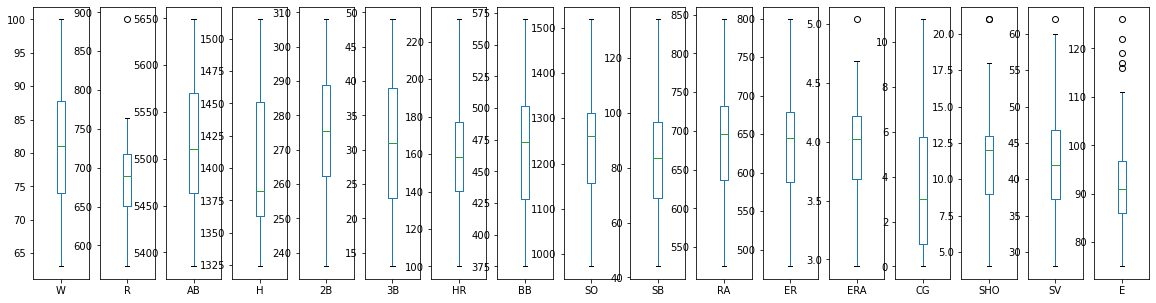

In [8]:
df.plot(kind="box",subplots=True,figsize=(20,5))

In [9]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

<AxesSubplot:xlabel='SV'>

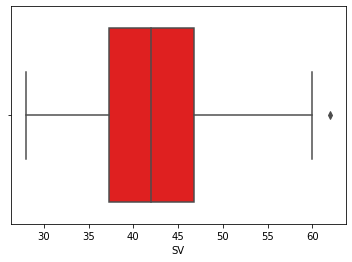

In [10]:
#checking for ouliers 
sns.boxplot(df["SV"],color="r")

<AxesSubplot:xlabel='E'>

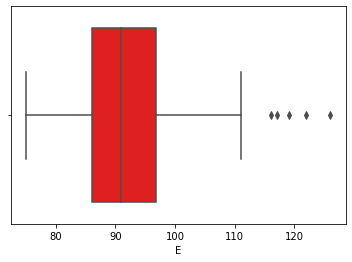

In [11]:
sns.boxplot(df["E"],color="r")

<AxesSubplot:xlabel='SHO'>

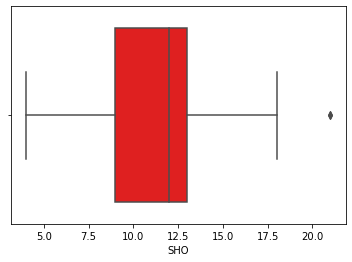

In [12]:
#checking for ouliers 
sns.boxplot(df["SHO"],color="r")

<AxesSubplot:xlabel='ERA'>

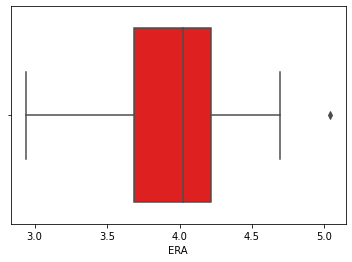

In [13]:
sns.boxplot(df["ERA"],color="r")

<AxesSubplot:xlabel='R'>

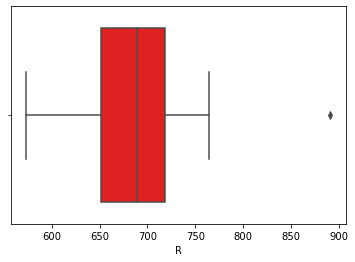

In [14]:
sns.boxplot(df["R"],color="r")
#red boxes indicate columns with outliers 

<AxesSubplot:xlabel='H'>

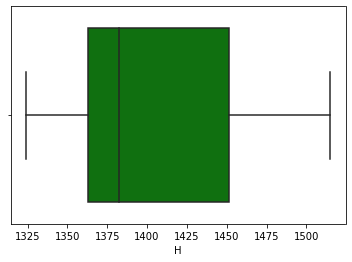

In [15]:
sns.boxplot(df["H"],color="g")
#green shows OK column

In [16]:
#identifying outliers 
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [17]:
#keeping the raw data and creating a new dataframe
dfn=df[(z<3).all(axis=1)]

In [18]:
dfn.shape

(29, 17)

In [19]:
df.shape

(30, 17)

In [20]:
1/30*100


3.3333333333333335

In [21]:
dfn.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


W         AxesSubplot(0.125,0.125;0.0383663x0.755)
R       AxesSubplot(0.17104,0.125;0.0383663x0.755)
AB     AxesSubplot(0.217079,0.125;0.0383663x0.755)
H      AxesSubplot(0.263119,0.125;0.0383663x0.755)
2B     AxesSubplot(0.309158,0.125;0.0383663x0.755)
3B     AxesSubplot(0.355198,0.125;0.0383663x0.755)
HR     AxesSubplot(0.401238,0.125;0.0383663x0.755)
BB     AxesSubplot(0.447277,0.125;0.0383663x0.755)
SO     AxesSubplot(0.493317,0.125;0.0383663x0.755)
SB     AxesSubplot(0.539356,0.125;0.0383663x0.755)
RA     AxesSubplot(0.585396,0.125;0.0383663x0.755)
ER     AxesSubplot(0.631436,0.125;0.0383663x0.755)
ERA    AxesSubplot(0.677475,0.125;0.0383663x0.755)
CG     AxesSubplot(0.723515,0.125;0.0383663x0.755)
SHO    AxesSubplot(0.769554,0.125;0.0383663x0.755)
SV     AxesSubplot(0.815594,0.125;0.0383663x0.755)
E      AxesSubplot(0.861634,0.125;0.0383663x0.755)
dtype: object

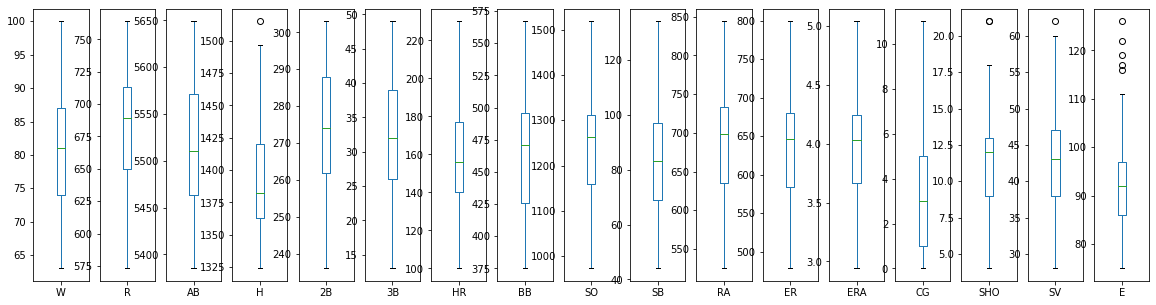

In [22]:
#checking for outlier in new dataframe
dfn.plot(kind="box",subplots=True,figsize=(20,5))

<AxesSubplot:xlabel='E'>

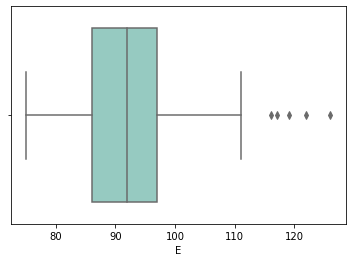

In [23]:
sns.boxplot(dfn["E"], palette="Set3")

<AxesSubplot:xlabel='SV'>

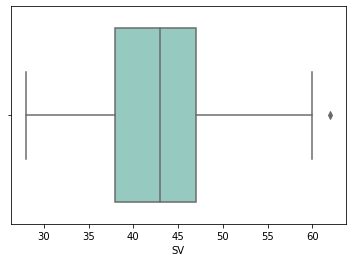

In [24]:
sns.boxplot(dfn["SV"],palette="Set3")

<AxesSubplot:xlabel='SHO'>

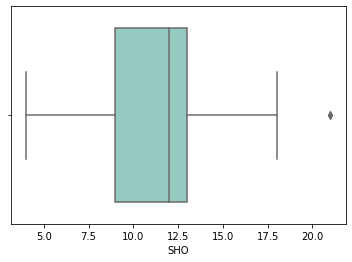

In [25]:
sns.boxplot(dfn["SHO"],palette="Set3")

<AxesSubplot:xlabel='ERA'>

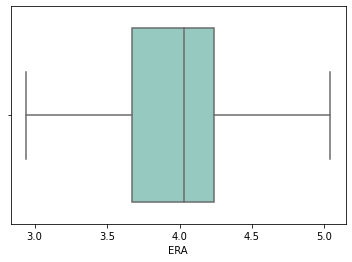

In [26]:
sns.boxplot(dfn["ERA"],palette="Set3")

<AxesSubplot:xlabel='CG'>

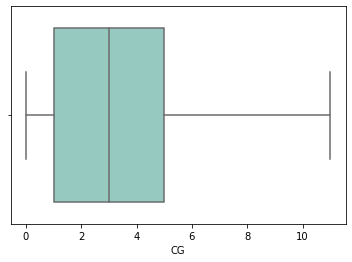

In [27]:
sns.boxplot(dfn["CG"],palette="Set3")

In [28]:
# checking for skewness i new dataframe 
dfn.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [29]:
dfn

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [30]:
dfn.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

0.8402711976867623


0.5833075389348484

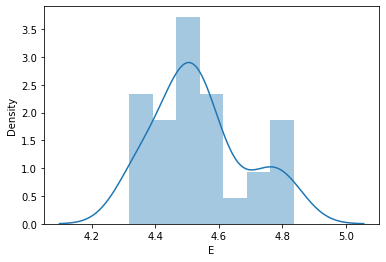

In [31]:
print(dfn["E"].skew())
dfn["E"]=np.log(dfn["E"])
sns.distplot(dfn["E"])
dfn["E"].skew()
#dfn["E"]=np.sqrt(dfn["E"])

0.8549795901105167


-0.2606778075812151

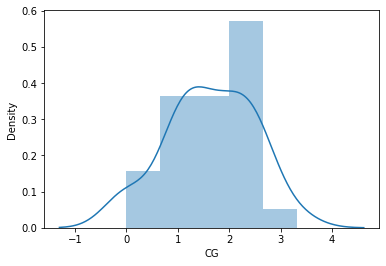

In [32]:
print(dfn["CG"].skew())
dfn["CG"]=np.sqrt(dfn["CG"])
sns.distplot(dfn["CG"])
dfn["CG"].skew()
#dfn["E"]=np.log(dfn["E"])

0.6274804879503074


0.37027995254293594

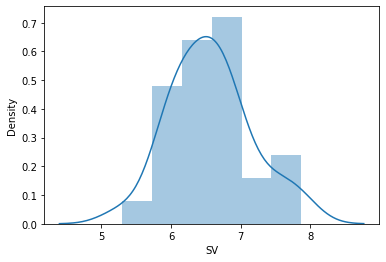

In [33]:
print(dfn["SV"].skew())
dfn["SV"]=np.sqrt(dfn["SV"])
sns.distplot(dfn["SV"])
dfn["SV"].skew()
#dfn["SV"]=np.log(dfn["SV"])

0.5269430585305683


-0.08580249517743828

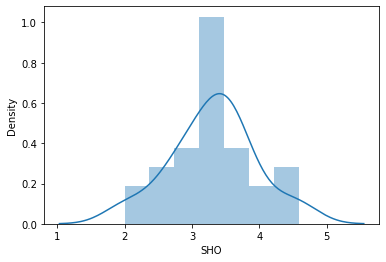

In [34]:
print(dfn["SHO"].skew())
dfn["SHO"]=np.sqrt(dfn["SHO"])
sns.distplot(dfn["SHO"])
dfn["SHO"].skew()
#dfn["SV"]=np.log(dfn["SV"])

In [35]:
dfn.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO   -0.085802
SV     0.370280
E      0.583308
dtype: float64

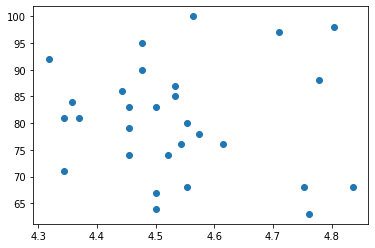

In [36]:
plt.scatter(dfn["E"],dfn["W"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x26825e5b670>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x26825e5b4c0>,
 'cmins': <matplotlib.collections.LineCollection at 0x26825e5b520>,
 'cbars': <matplotlib.collections.LineCollection at 0x26825e5bb20>}

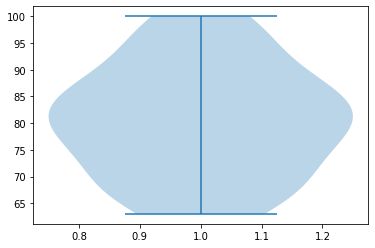

In [37]:
plt.violinplot(dfn["W"] )

In [38]:
dfn.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,1.626330,3.310612,6.561112,4.538896
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,0.851396,0.631202,0.585616,0.143925
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,2.000000,5.291503,4.317488
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,3.000000,6.164414,4.454347
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,1.732051,3.464102,6.557439,4.521789
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,2.236068,3.605551,6.855655,4.574711
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,3.316625,4.582576,7.874008,4.836282


<AxesSubplot:>

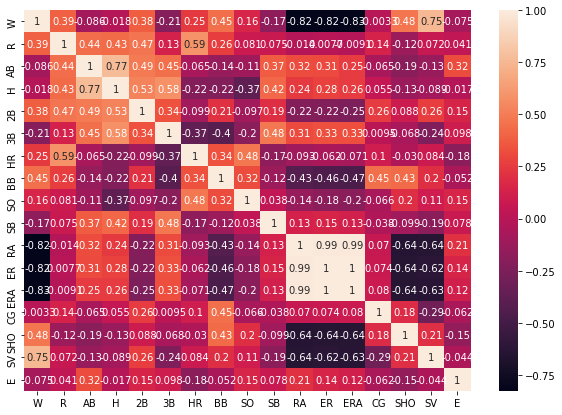

In [39]:
cor=dfn.corr()

plt.figure(figsize=(10,7))
sns.heatmap(cor, annot=True)

<AxesSubplot:>

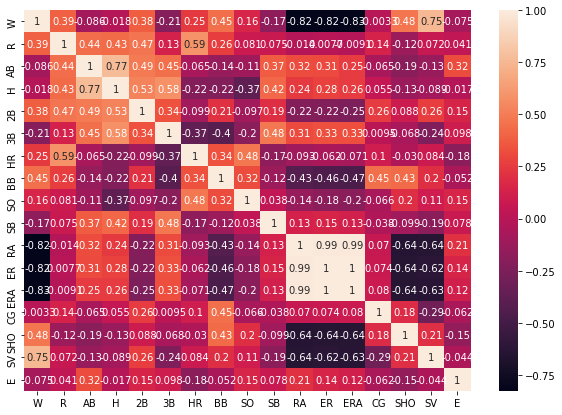

In [40]:
cor=dfn.corr()

plt.figure(figsize=(10,7))
sns.heatmap(cor, annot=True)

In [41]:
dfn=dfn.drop("ER",axis=1)
dfn=dfn.drop("ERA",axis=1)
dfn=dfn.drop("RA",axis=1)

<AxesSubplot:>

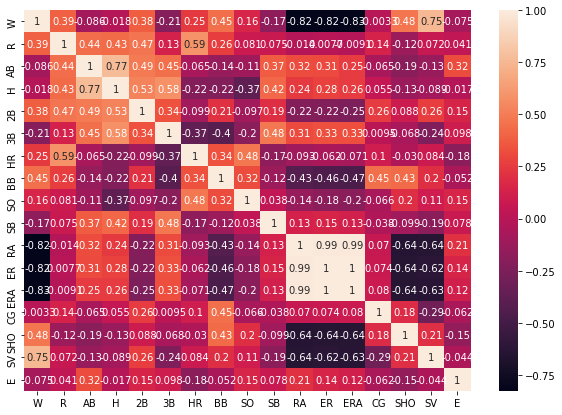

In [42]:

plt.figure(figsize=(10,7))
sns.heatmap(cor, annot=True)

In [43]:
x=dfn.drop("W",axis=1)
y=dfn["W"]
x=pd.DataFrame(x)

In [44]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,1.414214,2.828427,7.483315,4.477337
1,696,5467,1349,277,44,156,439,1264,70,1.414214,3.464102,6.708204,4.454347
2,669,5439,1395,303,29,141,533,1157,86,3.316625,3.162278,6.164414,4.369448
3,622,5533,1381,260,27,136,404,1231,68,2.645751,3.000000,6.082763,4.615121
4,689,5605,1515,289,49,151,455,1259,83,2.645751,3.464102,5.916080,4.454347
6,764,5567,1397,272,19,212,554,1227,63,1.732051,2.000000,6.928203,4.532599
7,713,5485,1370,246,20,217,418,1331,44,0.000000,3.162278,6.557439,4.343805
8,644,5485,1383,278,32,167,436,1310,87,1.000000,3.464102,7.745967,4.553877
9,748,5640,1495,294,33,161,478,1148,71,1.732051,3.162278,6.324555,4.574711
10,751,5511,1419,279,32,172,503,1233,101,2.236068,3.000000,6.708204,4.779123


<AxesSubplot:>

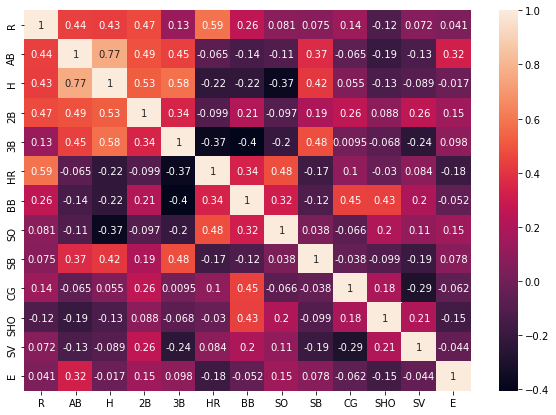

In [45]:
corx=x.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corx, annot=True)

In [46]:
x.shape

(29, 13)

In [47]:
from sklearn.decomposition import PCA

In [48]:
PCa=PCA(n_components=9)

In [49]:
x=PCa.fit_transform(x)

In [50]:
x.shape

(29, 9)

<AxesSubplot:>

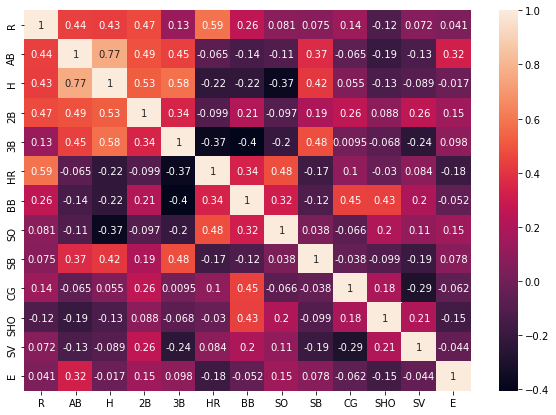

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(corx, annot=True)

In [52]:
x=pd.DataFrame(data=x)
y=pd.DataFrame(data=y)

In [53]:
x.skew()

0    0.246760
1    0.016380
2    0.222982
3    0.401024
4    0.442987
5    1.111011
6   -0.038927
7    0.513115
8   -0.207723
dtype: float64

-0.08580249517743828


-0.4050193629445939

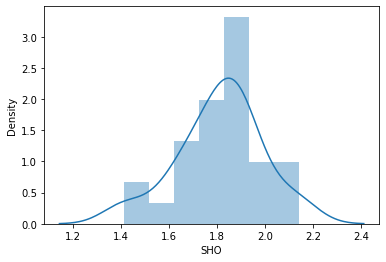

In [54]:
print(dfn["SHO"].skew())
dfn["SHO"]=np.sqrt(dfn["SHO"])
sns.distplot(dfn["SHO"])
dfn["SHO"].skew()
#dfn["SV"]=np.log(dfn["SV"])

In [55]:
def calc_vif():
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor (x.values,i) for i in range (x.shape[1])]
    return (vif)


In [56]:
calc_vif()

,variables,VIF FACTOR
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,1.0


In [57]:
#all functons for ML
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [58]:
#for checking the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [59]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [61]:
x_train

array([[ 8.64291517e-01,  1.03631843e+00, -1.46876111e+00,
        -2.21422277e-01, -1.47852741e+00,  7.90434970e-01,
        -1.00027500e+00, -1.74745294e+00,  9.48316055e-03],
       [ 2.79522504e-01,  1.65722380e+00,  2.54007281e-01,
         1.07240612e+00,  1.08510197e+00, -1.36000845e-01,
        -4.92877777e-01, -5.96759405e-01,  8.06962881e-03],
       [ 4.22982607e-01, -1.42455188e+00, -3.40325201e-01,
        -7.30560545e-01, -1.38804074e+00, -1.74421821e+00,
        -9.27064249e-01,  5.67692388e-01, -1.98576164e+00],
       [ 1.31544751e+00, -1.38137744e+00,  9.92562221e-01,
        -6.92499169e-05,  6.55579184e-01, -1.16514133e+00,
         1.70150548e-01, -3.48438387e-01,  7.64936563e-01],
       [-5.53866899e-01,  2.84758853e-01, -1.13105081e+00,
         1.38060990e-01, -4.18368534e-01, -4.06772293e-01,
         1.04778217e+00,  2.48820711e-01,  5.86317674e-01],
       [ 1.08256240e+00, -5.65334021e-01,  2.62298674e-01,
        -4.62866890e-01, -1.19389544e+00, -6.634133

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
#saving best random state 
maxscor=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.linear_model import LinearRegression
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    sco=lm.score(x_train,y_train)
    if sco>maxscor:
        maxscor=sco
        maxRS=i

print("best accuracy  is ",maxscor, "with random state ",maxRS)

best accuracy  is  0.8856786941938383 with random state  40


In [64]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet

In [65]:
#linear regression 
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
lm_score=lm.score(x_train,y_train)*100
lm_score

56.86242676676822

In [66]:
#Lasso 
ls=Lasso(alpha=0.000001)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
ls_score=ls.score(x_train,y_train)*100
ls_score

56.86242676676816

In [67]:
#Ridge 
rd=Ridge(alpha=0.000001)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd_score=rd.score(x_train,y_train)*100
rd_score

56.86242676676822

In [68]:
#elastic net
en=ElasticNet(alpha=0.000001)
en.fit(x_train,y_train)
pred=en.predict(x_test)
en_score=en.score(x_train,y_train)*100
en_score

56.862426766768216

In [69]:
print (lm_score)
print (ls_score)
print (rd_score)
print (en_score)

56.86242676676822
56.86242676676816
56.86242676676822
56.862426766768216


In [70]:
# Cross validation
from sklearn.model_selection import cross_val_score

In [71]:
models=(lm,ls,rd,en)
for i in models:
    print (i , cross_val_score(i,x,y,cv=5).mean())

LinearRegression() -1.5142245582775216
Lasso(alpha=1e-06) -1.514224532888907
Ridge(alpha=1e-06) -1.514224557955806
ElasticNet(alpha=1e-06) -1.5142245420520273


In [72]:
print (lm_score+(-1.5142245582775216))
print (ls_score+(-1.514224532888907))
print (rd_score+(-1.514224557955806))
print (en_score+(-1.5142245420520273))

55.348202208490704
55.34820223387925
55.34820220881242
55.34820222471619


In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters={"selection":["cyclic","random"],
            "copy_X":["true","false"],
             "random_state":np.arange(1,50),
           "max_iter":np.arange(1,5)}

In [75]:
GCV=GridSearchCV(Lasso(),parameters,cv=5)

In [76]:
rd.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [77]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'copy_X': ['true', 'false'],
                         'max_iter': array([1, 2, 3, 4]),
                         'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'selection': ['cyclic', 'random']})

In [78]:
GCV.best_params_

{'copy_X': 'true', 'max_iter': 1, 'random_state': 15, 'selection': 'random'}

In [79]:
##final model selection 

In [80]:
fin_mod=Lasso(copy_X="flase", max_iter= 1, random_state=15,selection= 'cyclic')
fin_mod.fit(x_train ,y_train)
pred=fin_mod.predict(x_test)
scoree=fin_mod.score(x_train,y_train)
print(scoree*100)

56.09358504475077


In [81]:
#correction detail -  slection in random state gives less accuracy of the model so replaced  with cyclic. 

In [82]:
import joblib
joblib.dump(fin_mod,"Baseball dataset.pkl")

['Baseball dataset.pkl']